<a href="https://colab.research.google.com/github/FahmidaMitu/COVID-19-Severity-Detection-from-Lung-CT-Scan-Images-using-CNN/blob/codes/Densenet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2

classified_path = '/content/drive/MyDrive/CSE499/Classified_Images/'
zero_path = classified_path + '0/'
one_path = classified_path + '1/'
two_path = classified_path + '2/'
three_path = classified_path + '3/'
four_path = classified_path + '4/'
five_path = classified_path + '5/'


In [ ]:
labels = ( 'Severe', 'Normal', 'Moderate', 'Minimal', 'Extent', 'Critical')
print(labels)

('Severe', 'Normal', 'Moderate', 'Minimal', 'Extent', 'Critical')


In [ ]:
severity = None
x = []
y = []
img_size=(224,224)
import matplotlib.pyplot as plt
import cv2
def make_whole_dataset(directory, severity):
    try:
        for img in os.listdir(directory):
            path = os.path.join(directory,img)
            img_array = cv2.imread(path,cv2.IMREAD_COLOR)
            img_array = cv2.resize(img_array,img_size)
            x.append(np.array(img_array))
            y.append(str(severity))
    except:
        None

In [ ]:
make_whole_dataset(zero_path, 'Severe')
make_whole_dataset(one_path, 'Normal')
make_whole_dataset(two_path, 'Moderate')
make_whole_dataset(three_path, 'Minimal')
make_whole_dataset(four_path, 'Extent')
make_whole_dataset(five_path, 'Critical')

In [ ]:
print(len(x))
print(len(y))

3053
3053


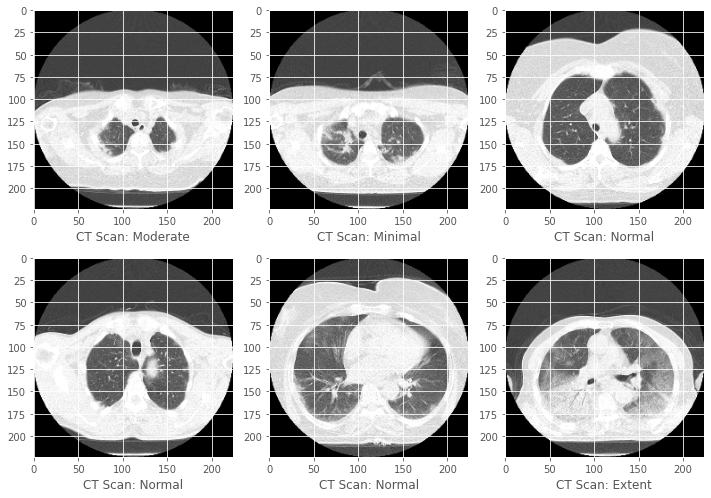

In [ ]:
import random

plt.style.use('ggplot')
fig = plt.figure(figsize=(12,10))
fig.set_size_inches(10,10)
for i in range(6):
    plt.subplot(3,3,i+1)
    sample = random.randint(0,len(y))
    plt.imshow(x[sample])
    plt.xlabel("CT Scan: {}".format(y[sample]))
    
plt.tight_layout()

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y, 6)

In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(x)
x = x/255.0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, Lambda, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.applications.densenet import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow.keras.optimizers
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

In [ ]:
new_input = Input(shape=(224, 224, 3))
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_tensor=new_input, pooling='avg')

for layers in densenet121.layers:
    layers.trainable = False
x = densenet121.output
x = Flatten()(x)

predictions = Dense(6, activation='softmax')(x)
densenet121_model = Model(inputs=densenet121.input, outputs = predictions)

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
densenet121_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = densenet121_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = num_epochs)

Epoch 1/30
77/77 [==============================] - 362s 5s/step - loss: 1.4941 - accuracy: 0.4242 - val_loss: 1.2587 - val_accuracy: 0.4877
Epoch 2/30
77/77 [==============================] - 353s 5s/step - loss: 1.1865 - accuracy: 0.5152 - val_loss: 1.0832 - val_accuracy: 0.5646
Epoch 3/30
77/77 [==============================] - 353s 5s/step - loss: 1.0583 - accuracy: 0.5749 - val_loss: 1.0369 - val_accuracy: 0.5761
Epoch 4/30
77/77 [==============================] - 355s 5s/step - loss: 0.9848 - accuracy: 0.5979 - val_loss: 0.9513 - val_accuracy: 0.5990
Epoch 5/30
77/77 [==============================] - 354s 5s/step - loss: 0.9400 - accuracy: 0.6319 - val_loss: 0.9336 - val_accuracy: 0.6137
Epoch 6/30
77/77 [==============================] - 354s 5s/step - loss: 0.8967 - accuracy: 0.6478 - val_loss: 0.9032 - val_accuracy: 0.6252
Epoch 7/30
77/77 [==============================] - 352s 5s/step - loss: 0.8709 - accuracy: 0.6511 - val_loss: 0.8885 - val_accuracy: 0.6121
Epoch 8/30
77

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = densenet121_model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

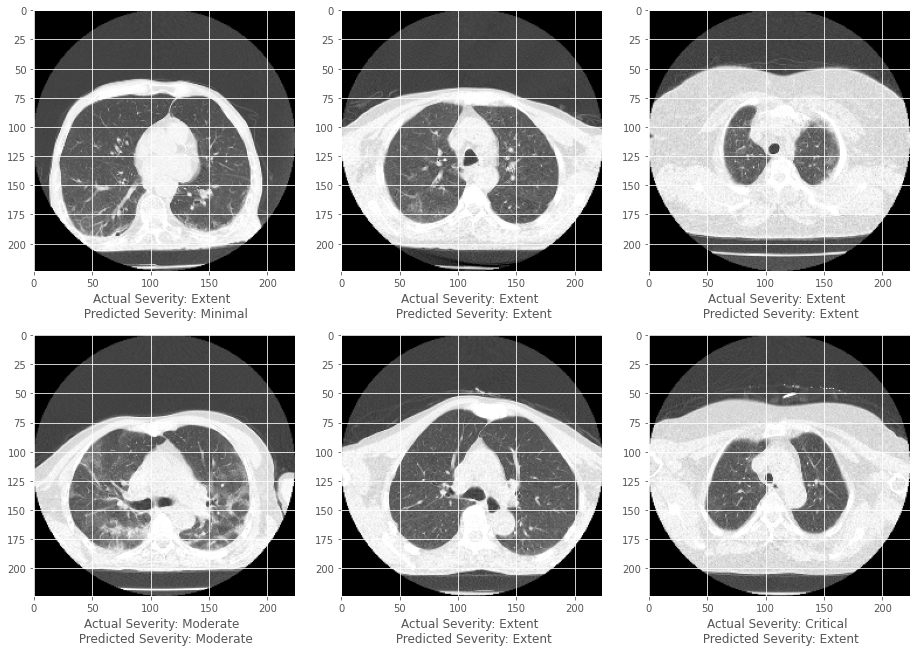

In [ ]:
import random
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,10))
fig.set_size_inches(13,13)
for i in range(6):
    plt.subplot(3,3,i+1)
    sample = random.randint(0,len(y_test)-1)
    plt.imshow(x_test[sample])
    var = np.argmax(y_test[sample])
    plt.xlabel("Actual Severity: {} \n Predicted Severity: {}".format(labels[var], labels[y_pred[sample]]))
    
plt.tight_layout()

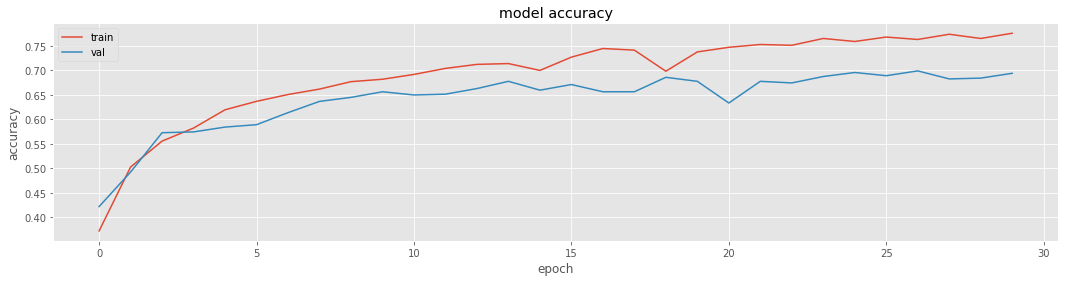

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

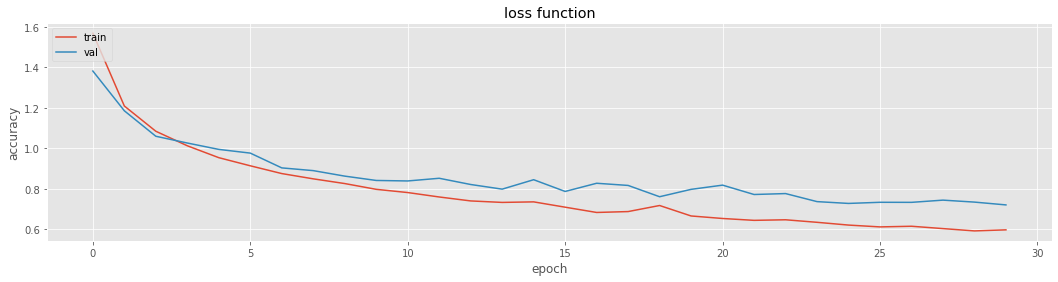

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()